In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.windows import Window

In [2]:
tiff5 = './assets/DHMVIIDSMRAS1m_k05.tif'
tiff12 = "./assets/DHMVIIDSMRAS1m_k12.tif"
tiff13 = "./assets/DHMVIIDSMRAS1m_k13.tif"


In [61]:
SHP13 = gpd.read_file('./assets/DHMVIIDSMRAS1m_k13/DHMVII_vdc_k13.shp')

## Geopandas tryout

In [62]:
SHP13.head()

,Date,OpnDatum1,OpnDatum2,geometry
0,20150305,2015-03-05,None,"POLYGON Z ((98000.000 217783.121 0.000, 97997...."
1,20150306,2015-03-06,None,"POLYGON Z ((98000.000 217465.109 0.000, 98000...."
2,20150308,2015-03-08,None,"POLYGON Z ((98000.000 213046.450 0.000, 98000...."
3,20150310,2015-03-10,None,"POLYGON Z ((98000.000 209075.241 0.000, 98000...."
4,20150311,2015-03-11,None,"POLYGON Z ((98000.000 204542.782 0.000, 98000...."


In [63]:
type(SHP13)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

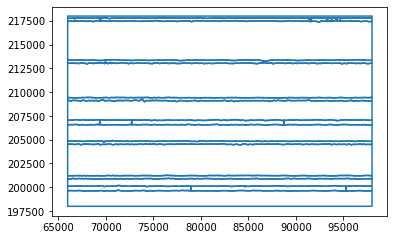

In [64]:
SHP13.boundary.plot() #only border info

<AxesSubplot:>

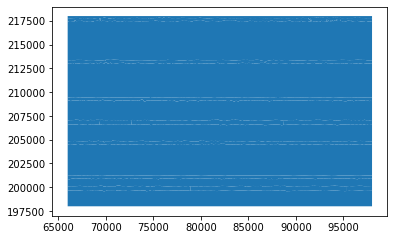

In [65]:
SHP13.geometry.plot()


In [66]:
SHP13.geometry.shape

(12,)

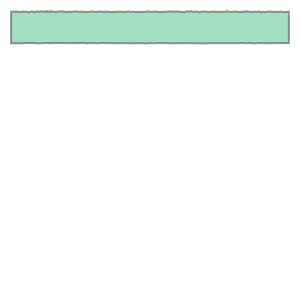

In [67]:
SHP13.geometry[2]

In [69]:
SHP13.crs

## RasterIO

## CREATE RASTERIO DATASET OBJECT

In [70]:
geo13 = rasterio.open(tiff13)

## Get metadata

In [71]:
geo13.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 32000,
 'height': 20000,
 'count': 1,
 'crs': CRS.from_epsg(31370),
 'transform': Affine(1.0, 0.0, 66000.0,
        0.0, -1.0, 218000.0)}

In [72]:
geo13.crs

CRS.from_epsg(31370)

## Get raterio dataset's bounds

In [73]:
geo13.bounds

BoundingBox(left=66000.0, bottom=198000.0, right=98000.0, top=218000.0)

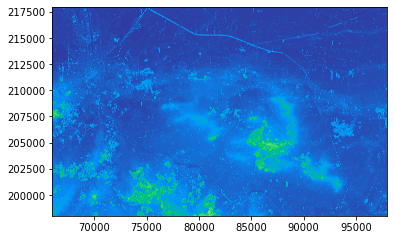

<AxesSubplot:>

In [74]:
rasterio.plot.show(geo13,cmap='terrain') #to big!


In [75]:
type(geo13)

rasterio.io.DatasetReader

In [76]:
geo13.transform*(0,0)  #upper left coordinates

(66000.0, 218000.0)

In [77]:
geo13.profile


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 32000, 'height': 20000, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 66000.0,
       0.0, -1.0, 218000.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

## window into a smaller part of the Geotiff

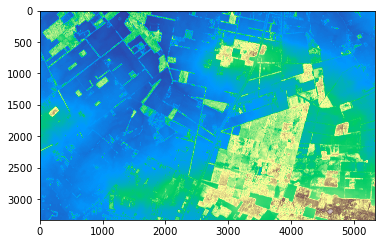

<AxesSubplot:>

In [98]:
import rasterio
width = 32000  #columns
height = 20000 #rows
with rasterio.open("./assets/DHMVIIDSMRAS1m_k13.tif") as src:
    w = src.read(1, window=Window(width/2, height/2, width/6, height/6))

rasterio.plot.show(w,cmap='terrain')

In [57]:
type(w)

numpy.ndarray

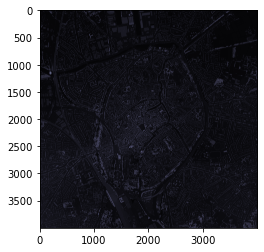

<AxesSubplot:>

In [106]:
from rasterio.windows import from_bounds
from rasterio.enums import Resampling

Bruges_lamb_long = 70151.33
Bruges_lamb_lat = 211744.50

left = Bruges_lamb_long - 2000
right = Bruges_lamb_long + 2000
bottom = Bruges_lamb_lat - 2000
top = Bruges_lamb_lat + 2000

with rasterio.open("./assets/DHMVIIDSMRAS1m_k13.tif") as src:
    rst = src.read(1, window=from_bounds(left, bottom, right, top, src.transform))
    
rasterio.plot.show(rst, cmap='bone')


## GPS coordinates of Brugge, Belgium. Latitude: 51.2089 Longitude: 3.2242

In [13]:
# data5 = rasterio.open(tiff5)

# show(data5)

In [14]:
# data13 = rasterio.open(tiff13)

# show(data13)

In [15]:
# data13.meta

## GDAL

In [16]:
# from osgeo import gdal
# import matplotlib.pyplot as plt

# dataset = gdal.Open(tiff12, gdal.GA_ReadOnly) # Note GetRasterBand() takes band no. starting from 1 not 0
# band = dataset.GetRasterBand(1)
# arr = band.ReadAsArray()
# plt.imshow(arr)